In [45]:
import skimage
from skimage import io
import numpy as np
from math import *

import matplotlib.pyplot as plt
%matplotlib inline

In [103]:
tiger = io.imread('https://stepik.org/media/attachments/lesson/58181/tiger-color.png')
tiger_low_contrast = io.imread('https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png')
tiger_gray = io.imread('https://stepik.org/media/attachments/lesson/58180/tiger-gray.png')
rgb_photo = img = io.imread('https://stepik.org/media/attachments/lesson/58180/img.png')
tiger_stable_contrast = io.imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png')
rail_road = io.imread('https://stepik.org/media/attachments/lesson/60610/railroad.png')
rail_road_gray = io.imread('https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png')

In [ ]:
from skimage import io
img = io.imread('img.png')

io.imsave('out_img.png', img)

### 2.1 Цифровое изображение. Чтение, запись, работа с пикселями

In [ ]:
# Количество столбцов
img = io.imread('img.png')
print(img.shape[1])

In [74]:
# Изменение цвета пикселя изображения
img = io.imread('img.png')
height, width = img.shape[:2]
img[int(height/2), int(width/2)] = [102, 204, 102]
io.imsave('out_img.png', img)

In [ ]:
# Изменение цвета прямоугольника
img = io.imread('img.png')
height, width = img.shape[:2]
img[height//2 - 3 : height//2 + 4, width//2 - 7 : width//2 + 8] = [255, 192, 203]
io.imsave('out_img.png', img)

### 2.2 Арифметические операции. Каналы. Вычисление яркости изображения

In [ ]:
# Вычисление негатива изображения
img = io.imread('img.png')
img = img / 255
io.imshow(img.max() - img)
io.imsave('out_img.png', img)

In [ ]:
#Поменять местами каналы изображения
res = io.imread('img.png')
res = img.copy()
res[:,:,0], res[:,:,1], res[:,:,2] = img[:,:,2], img[:,:,0], img[:,:,1]
io.imsave('out_img.png', res)

In [ ]:
# Подсчет яркости изображения
img = skimage.img_as_float(tiger)
img1 = 0.2126*img[:,:,0] + 0.7152*img[:,:,1]+0.0722*img[:,:,2]
img2 = skimage.img_as_ubyte(img1)
io.imshow(img2)

In [26]:
# Сопоставление фотографий Прокудина-Горского (не работает)
def align(img, g_coord):
    row_g, col_g = g_coord
    # считаем сдвиги каналов
    one_image_height = int(img.shape[0] / 3)
    r = img[0:one_image_height, :]
    g = img[one_image_height:one_image_height*2, :]
    b = img[one_image_height*2:one_image_height*3, :]

    height_to_remove = int(r.shape[0] * 0.05)
    width_to_remove = int(r.shape[1] * 0.05)
    
    r = r[height_to_remove:r.shape[0]-height_to_remove, 
          width_to_remove:r.shape[1]-width_to_remove]
    b = b[height_to_remove:b.shape[0]-height_to_remove, 
          width_to_remove:b.shape[1]-width_to_remove]
    g = g[height_to_remove:g.shape[0]-height_to_remove, 
          width_to_remove:g.shape[1]-width_to_remove]
     
    print(r.shape, g.shape, b.shape)

    # сдвигаем точку на зеленом канале
    # на другие каналы
    return (0,0), (0, 0)

align(img, (508, 237))

In [ ]:
img = tiger_low_contrast.copy()
k = round(img.size * 0.05)

In [ ]:
x = sorted(img.flatten())
x1 = x[k:((img.size - 1) - k)]
min(x1), max(x1)

### 3.1 Линейная коррекция контраста

In [ ]:
# Автоконтраст черно-белого изображения
from skimage import io
img = io.imread('img.png')
img = (img - img.min()) * (255 / (img.max() - img.min()))
io.imsave('out_img.png', img.astype('uint8'))

In [ ]:
# Подсчет минимума и максимума устойчивого автоконтраста
from skimage import io
img = io.imread('img.png')

k = round(img.size * 0.05)
x = sorted(img.flatten())
x1 = x[k:((img.size - 1) - k)]
print(min(x1), max(x1))

In [ ]:
# Устойчивый автоконтраст черно-белого изображения
from skimage import io
import numpy as np
img = io.imread('img.png')

k = round(img.size * 0.05)

x1 = sorted(img.flatten())
x1 = x1[k:((img.size - 1) - k)]
img = np.clip(img, min(x1), max(x1))
img = (img - min(x1)) * (255 / (max(x1) - min(x1)))

io.imsave('out_img.png', img.astype(np.uint8))

In [4]:
np.array_equal(tiger_stable_contrast, img.astype(np.uint8))
# np.array_equal(tiger_stable_contrast, img.astype('uint8'))
# np.array_equal(tiger_stable_contrast, skimage.img_as_ubyte(img))

True

### 3.2 Коррекция контраста цветного изображения

In [314]:
img = io.imread('https://stepik.org/media/attachments/lesson/60609/tiger-color.png')
output = io.imread('https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png')

In [315]:
# Устойчивый цветной автоконтраст
# 1
img = skimage.img_as_float(img)
# 2
Y = 0.2126*img[:,:,0] + 0.7152*img[:,:,1] + 0.0722*img[:,:,2]
U =-0.0999*img[:,:,0] - 0.3360*img[:,:,1] + 0.4360*img[:,:,2]
V = 0.6150*img[:,:,0] - 0.5586*img[:,:,1] - 0.0563*img[:,:,2]
# 3
k = round(Y.size * 0.05)
x1 = sorted(Y.flatten())
x1 = x1[k : ((Y.size - 1) - k)]
Y = np.clip(Y, min(x1), max(x1))
# 4
stretched = (Y - min(x1)) / (max(x1) - min(x1))
# 5 
stretched = np.clip(stretched, 0, 1)
# 6
R = stretched + 1.2803*V
G = stretched - 0.2148*U - 0.3805*V
B = stretched + 2.1279*U

res = img.copy()
res[:,:,0] = R
res[:,:,1] = G
res[:,:,2] = B
# 7
res = np.clip(res, 0, 1)
# 8
res = skimage.img_as_ubyte(res)

io.imsave('out_img.png', res)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [316]:
np.array_equal(res, output)

False

In [62]:
num_equal = 0

for y in range(output.shape[0]):
    for x in range(output.shape[1]):
        for chan in range(output.shape[2]):
            if output[y][x][chan] == res[y][x][chan]:
                num_equal += 1

In [63]:
num_equal, res.size, res.size - num_equal

(1439265, 1440000, 735)

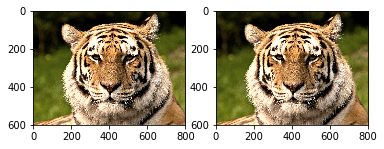

In [64]:
plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(output)

### 3.3 Преобразование серого мира

In [325]:
img = io.imread('https://stepik.org/media/attachments/lesson/60610/railroad.png')
output = io.imread('https://stepik.org/media/attachments/lesson/60610/railroad-gray-world.png')

In [326]:
import skimage
from skimage import io
import numpy as np

# 1
img = io.imread('img.png')
img = skimage.img_as_float(img)

r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]

r_mean, b_mean, g_mean = np.mean(r), np.mean(b), np.mean(g)

total_mean = (r_mean+b_mean+g_mean)/3
rw = r_mean / total_mean
bw = b_mean / total_mean
gw = g_mean / total_mean

r = r / rw
b = b / bw
g = g / gw

res = img.copy()
res[:,:,0] = r
res[:,:,1] = g
res[:,:,2] = b
res = np.clip(res, 0, 1)

io.imsave('out_img.png', skimage.img_as_ubyte(res))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [322]:
np.array_equal(output, skimage.img_as_ubyte(res))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


True

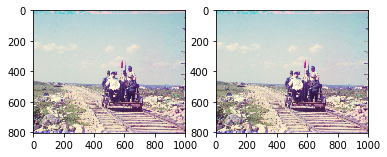

In [324]:
plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(output)

### 3.4 Выравнивание гистограммы

In [5]:
img = io.imread('https://stepik.org/media/attachments/lesson/60611/landscape.png')
output = io.imread('https://stepik.org/media/attachments/lesson/60611/landscape-histeq.png')

In [21]:
import skimage
from skimage import io
import numpy as np

# img = io.imread('img.png')

bins = np.zeros(256, np.uint32)
for v in img.flatten():
    bins[v] += 1
    
CDF = np.zeros(256, np.uint32)
for v in range(256):
    CDF[v] = CDF[v-1] + bins[v]
    
min_cum_sum = 99999
for elem in CDF:
    if elem != 0 and elem < min_cum_sum:
        min_cum_sum = elem
    
p = len(img.flatten())

res = img.copy()
for y in range(img.shape[0]):
    for x in range (img.shape[1]):
        pixel = img[y][x]
        res[y][x] = round((CDF[pixel]-min_cum_sum)/(p-1)*255)
        
io.imsave('out_img.png', res)

In [22]:
np.array_equal(res, output)

True

True


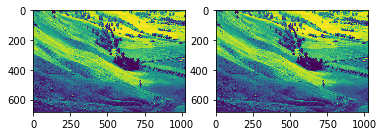

In [303]:
print(np.array_equal(res, output))
plt.subplot(1,2,1)
plt.imshow(res)
plt.subplot(1,2,2)
plt.imshow(output)

### 4.1 Операция свертки. Линейные фильтры

In [23]:
# Свертка
image = np.array([[0, -8, -3, -2], 
                [1, 9, -8, 0], 
                [9, -4, 5, -9], 
                [6, -4, 6, 3]])

kernel = np.array([[4, -5, 4], 
                   [-6, -8, -2], 
                   [1, 5, 5]])

from scipy.signal import convolve2d
convolve2d(kernel, img, mode='valid')

array([[-376, -238, -263, ..., -341, -386, -397],
       [-114, -196, -231, ..., -233, -228, -179],
       [-151, -375, -405, ..., -197, -133,  -73],
       ...,
       [-195, -301, -250, ..., -306, -329, -326],
       [-142, -254, -232, ..., -315, -289, -264],
       [-139, -252, -241, ..., -294, -291, -282]])

In [170]:
# Подсчет функции Гаусса
def Gauss(array):
    sigma = array[0]
    x = array[1]
    y = array[2]
    result = 1/((2*pi)*sigma**2)*e**((-x**2 - y**2)/(2*sigma**2))
    return result

array = list(map(int, input().split()))
res = Gauss(array)
print(res)

0.05854983152431917


In [284]:
# Ядро гауссовского фильтра
def gaussian(x, y, sigma):
    return 1/((2*pi)*sigma**2)*math.e**((-x**2 - y**2)/(2*sigma**2))

sigma = float(input())
k = round(3*sigma)

kernel = [[gaussian(x, y, sigma) for x in range(-k, k+1)] for y in range(-k, k+1)]

kernel = np.array(kernel)
norm_kernel = kernel / np.sum(kernel, axis=(0,1))

print('\n'.join([' '.join(['{:.5f}'.format(item) for item in row]) for row in norm_kernel]))

0.33
0.00010 0.00974 0.00010
0.00974 0.96065 0.00974
0.00010 0.00974 0.00010
